# **Task 1: Visually Exploring a Data Set** 
# Life Expectancy Analysis — Exploratory Data Analysis (EDA)
**Author:** Kush  
**Dataset:** Life Expectancy Data (country-year records)  
**Date:** (07-11-2025)

**Short summary / objective:**  
This notebook explores factors that influence life expectancy across countries and years (2000–2015). 

Tasks:
- Load and inspect data
- Clean and impute missing values responsibly
- Visualize distributions and outliers
- Explore bivariate relationships (GDP, Schooling, HIV/AIDS, etc.)
- Compute correlation and interpret
- Summarize actionable insights and next steps for modelling


## 1. Load dataset & imports

**Purpose:** load libraries and the CSV into a DataFrame. After this cell, inspect the first rows and the schema.

In [1]:
#importing pandas library
import pandas as pd

In [2]:
# create a dataframe and load the dataset into it
df = pd.read_csv('Life Expectancy Data.csv')

In [3]:
#print first 5 rows of the dataframe for inspection
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
#print last 5 rows of the dataframe for inspection
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [5]:
#print concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

**Observations:**
- The dataset contains 2,938 rows and 22 columns (country-year granularity).
- Some column names include unwanted spaces (e.g., `"Life expectancy "` vs `Life expectancy`). These must be normalized.
- Several numeric columns have missing values (GDP, Population, Hepatitis B, Alcohol, BMI etc.). We will quantify and choose appropriate imputation strategies next.


In [6]:
# print statistical summary of the dataframe
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


**Observations:**
- The mean life expectancy of this data set is 69.224932, mean GDP is 7483.158469, mean infant deaths is 30.303948
- To get the exact count of missing values in each column, we can use a combination of two pandas methods: .isnull() and .sum().
- df.isnull(): This part goes through our entire DataFrame (df) cell by cell.
- If a cell contains a missing value (NaN), it puts True in the corresponding cell of a new, temporary DataFrame.
- If a cell has a value, it puts False. So, df.isnull() creates a DataFrame of the same size as df, but filled with Trues and Falses indicating where the missing values are.

In [7]:
# count missing values in each column
missing_counts = df.isnull().sum()
print(missing_counts)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [8]:
# Print the list of exact column names
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


**observation:** we can see that the columns names are not uniform, some have spaces before words and some have spaces after word ends so lets normalize them.

## 2. Clean column names

**Purpose:** remove trailing spaces and make names consistent. This avoids bugs later.

In [9]:
# Normalize column names
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


**Why:** inconsistent column names cause silent errors later. After this step column names are now clean.


## 3. Missing value analysis

**Purpose:** count missing values per column. For each column show both absolute count and percent missing. 

Deleting rows to handle missing values, especially if many rows have just a few missing values, can lead to a significant loss of potentially valuable information. This can bias our analysis and prevent us from seeing the full picture or uncovering certain patterns . 

Given that we want a comprehensive exploration, simply throwing away data isn't ideal. This leads us to the other main strategy: imputation, or filling in the missing values. We see that mean is 69 while median is 72 , when mean< median it shows distributions is left skewed so we use median as it gives a more robust and unbiased approach.

In [10]:
import statistics 
columns_to_impute = ['Life expectancy', 'Adult Mortality',
'Alcohol', 'Hepatitis B','BMI', 'Polio', 'Total expenditure',
'Diphtheria', 'GDP', 'Population',
'thinness  1-19 years', 'thinness 5-9 years',
'Income composition of resources', 'Schooling']

# Now, let's write the Python code to fill these missing values using the median for each column
for col in columns_to_impute:
    median_val = df[col].median()

    # .fillna(value): This is the pandas method used to replace NaN values.
    # Fill missing values (NaN) and assign the result back to the column
    df[col] = df[col].fillna(median_val)
    print(f'filled missing values in column {col} with median {median_val}')

# After the loop, let's verify by checking missing counts again
print("\nMissing values count after imputation:")
print(df.isnull().sum())

# To see the proportion of missing values in each column
print("\nProportion of missing values after imputation:")
print(df.isnull().mean().sort_values(ascending=False))

# Let's also look at the info again to see the Non-Null counts
print("\nDataFrame info after imputation:")
df.info()

filled missing values in column Life expectancy with median 72.1
filled missing values in column Adult Mortality with median 144.0
filled missing values in column Alcohol with median 3.755
filled missing values in column Hepatitis B with median 92.0
filled missing values in column BMI with median 43.5
filled missing values in column Polio with median 93.0
filled missing values in column Total expenditure with median 5.755
filled missing values in column Diphtheria with median 93.0
filled missing values in column GDP with median 1766.947595
filled missing values in column Population with median 1386542.0
filled missing values in column thinness  1-19 years with median 3.3
filled missing values in column thinness 5-9 years with median 3.3
filled missing values in column Income composition of resources with median 0.677
filled missing values in column Schooling with median 12.3

Missing values count after imputation:
Country                            0
Year                               

**Key findings:**
- Columns with significant missingness: `population` (~652 missing), `hepatitis_b` (~553 missing), `gdp` (~448 missing), `total_expenditure` (~226), `alcohol` (~194).
- Small missingness: BMI, polio, diphtheria — still nontrivial.

**After imputation checks:**
- Missing counts are now zero for all used numeric columns.

**Decision point:** For continuous health indicators (BMI, alcohol), median imputation may be defensible. For GDP and population (highly skewed), median imputation is acceptable for EDA.


We again Confirm `df.describe()` to see whether medians changed means/quantiles substantially.

In [11]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## 4. Univariate analysis — Distribution of life expectancy

**Purpose:** understand central tendency, spread, skewness and outliers in the target variable.

**What to look for:** mean vs median; any long tails; extreme outliers (countries or years).

To create plots in Python, we commonly use libraries like Matplotlib or Seaborn.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Create the histogram using Seaborn's histplot function

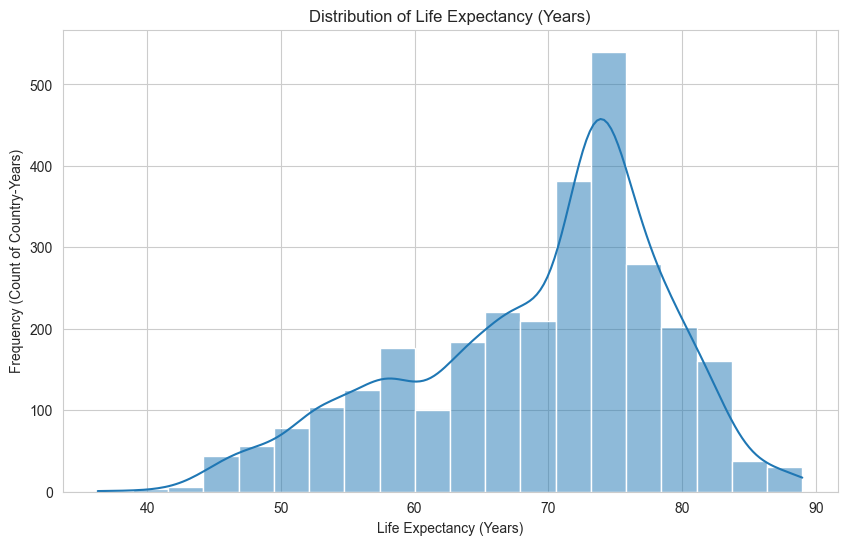

In [13]:
sns.set_style("whitegrid")# Set the seaborn style for better aesthetics
plt.figure(figsize=(10,6))# Set the figure size (width, height in inches)

sns.histplot(df['Life expectancy'], kde=True, bins=20)# Create the histogram

# Add titles and labels for clarity
plt.title('Distribution of Life Expectancy (Years)')# Title of the plot
plt.xlabel('Life Expectancy (Years)')# X-axis label
plt.ylabel('Frequency (Count of Country-Years)')# Y-axis label

# show the plot
plt.show()

Visualizing Location and Spread: The Box Plot

In [14]:
df.describe()['Life expectancy']

count    2938.000000
mean       69.234717
std         9.509115
min        36.300000
25%        63.200000
50%        72.100000
75%        75.600000
max        89.000000
Name: Life expectancy, dtype: float64

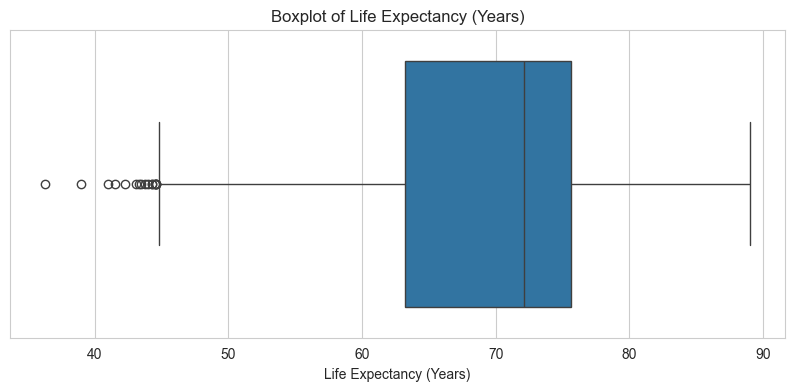

In [15]:
plt.figure(figsize=(10,4))  # Set the figure size (width, height in inches)

# create a boxplot for life expectancy using seaborn
sns.boxplot(x=df['Life expectancy'])

plt.title('Boxplot of Life Expectancy (Years)')  # Title of the plot
plt.xlabel('Life Expectancy (Years)')  # X-axis label
plt.show()  # Show the plot

**Insight: Box Plot Interpretation**  
- **Mean**: life expectancy ≈ 69.2 years; median ≈ 72.1 years. The median > mean suggests a left tail (a few low life expectancy values pulling mean down).

- **Range**: ~36 to 89 years. Investigate the low end (countries with life expectancy < 50) for special causes (e.g., high HIV/AIDS).

- **Median (Q2)**: The line inside the box is indeed the median (50th percentile), which is 72.1 years according to our .describe() output . Its position visually confirms the center of the data.

- **Box (IQR)**: Correct again. The box stretches from the 25th percentile (Q1 = 63.2 years) to the 75th percentile (Q3 = 75.6 years). The length of this box (IQR = Q3 - Q1 = 75.6 - 63.2 = 12.4 years) shows the range within which the middle 50% of the life expectancy values fall. It gives a sense of the data's spread around the median.

- **Whiskers**: The horizontal line with vertical caps at the ends represents the whiskers. They typically extend to the lowest data point within 1.5 * IQR below Q1 and the highest data point within 1.5 * IQR above Q3.

- **Skewness**: We Notice that the left whisker (extending towards the lower values) is longer than the right whisker. This indicates that the data below the first quartile (Q1) is more spread out than the data above the third quartile (Q3). This visually confirms the left skew we saw in the histogram! The data is stretched out towards the lower end.

- **Outliers**: The individual points plotted outside the whiskers are potential outliers. These are country-year observations with life expectancies that are unusually low (in this case) compared to the majority of the data points. Identifying outliers is an important part of EDA, as they might represent errors or genuinely extreme situations worth investigating later.

- **Summary**: The box plot effectively summarizes the distribution: the center (median line), the spread of the middle half (box length), the spread of the bulk of the data (whiskers), the skewness (unequal whisker lengths), and potential extreme values (outliers).

## 5. Univariate analysis — other important variables

**Purpose:** plot distributions for adult_mortality, BMI, schooling, GDP and inspect skewness/outliers.

now we have seen visuals of life expectancy. Therefor along with that let us see histogram visuals of other important columns too

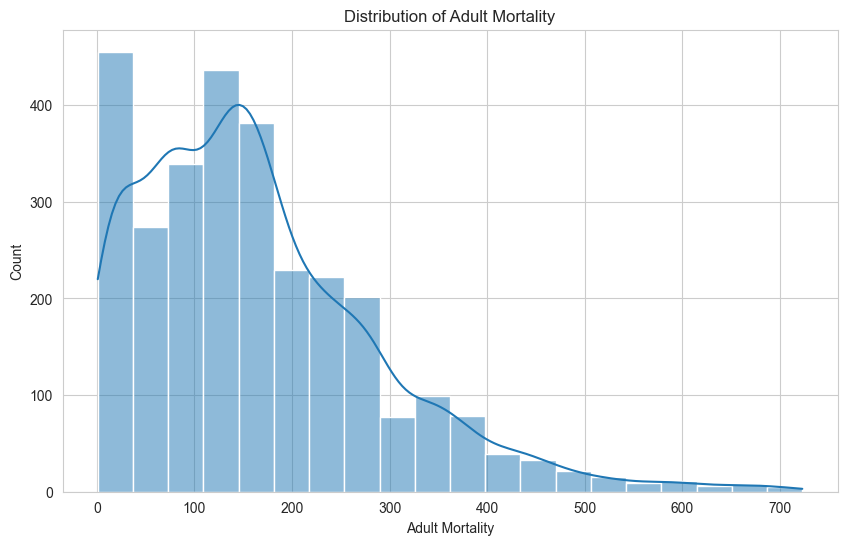

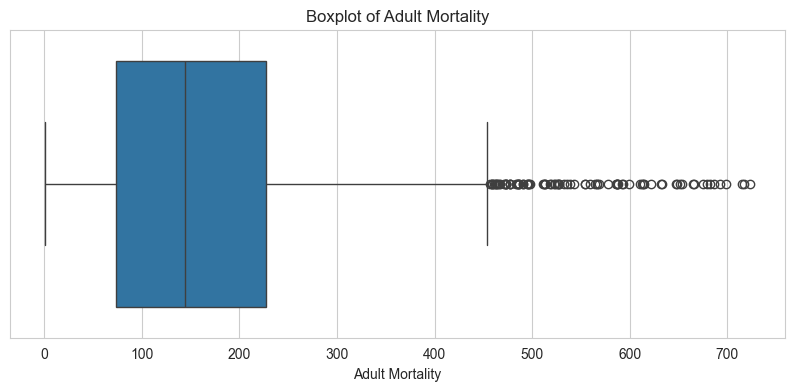

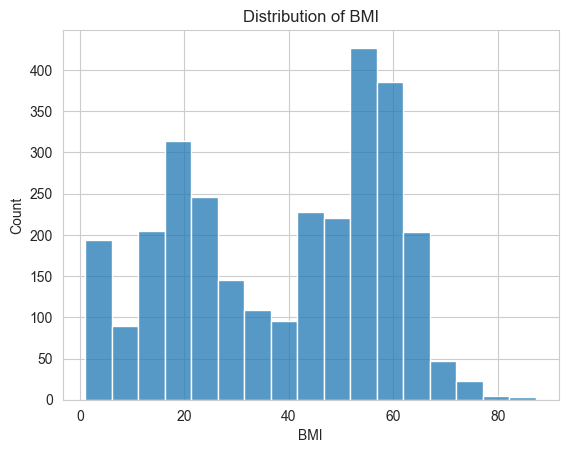

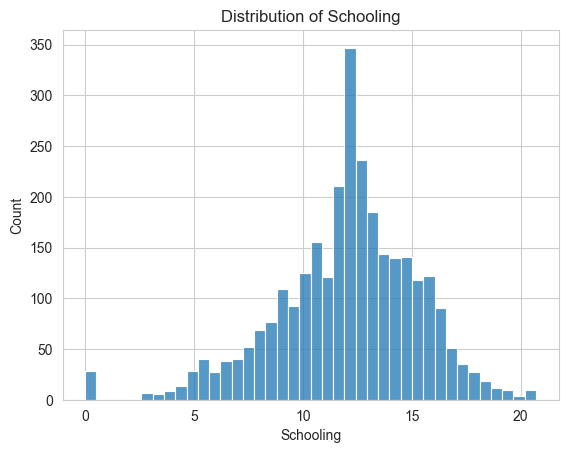

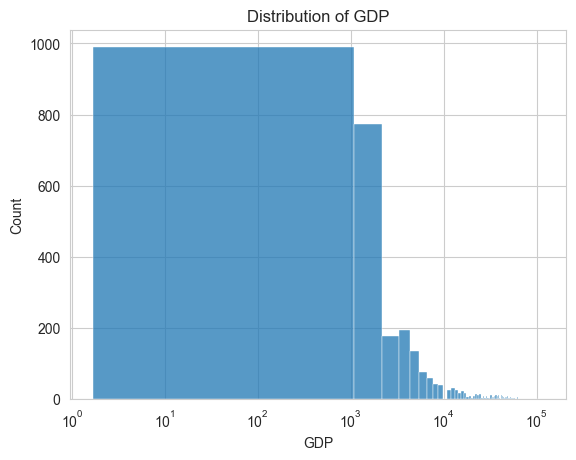

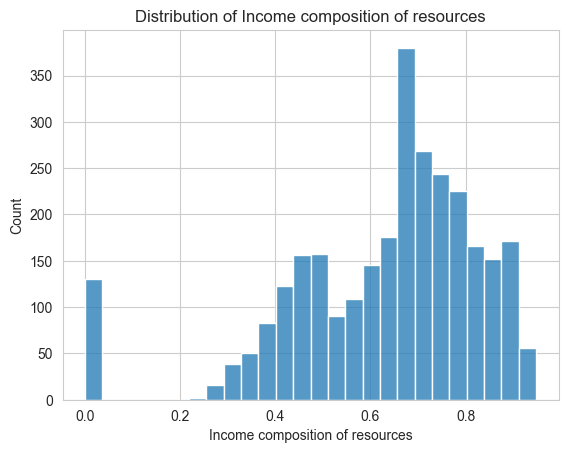

In [16]:
#histogram of adult mortality
plt.figure(figsize=(10,6))
sns.histplot(df['Adult Mortality'], kde=True, bins=20) 
plt.title('Distribution of Adult Mortality')
plt.show()

# Boxplot for Adult Mortality
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Adult Mortality']) 
plt.title('Boxplot of Adult Mortality')
plt.xlabel('Adult Mortality')  # X-axis label
plt.show()

# Histogram for BMI
plt.figure()
sns.histplot(df['BMI'])
plt.title('Distribution of BMI')
plt.show()

# Histogram for Schooling
plt.figure()
sns.histplot(df['Schooling'])
plt.title('Distribution of Schooling')
plt.show()

# Histogram for GDP - Check for skewness
plt.figure()
sns.histplot(df['GDP'])
# If GDP is heavily skewed (likely), consider log:
plt.xscale('log')
plt.title('Distribution of GDP')
plt.show()

# Histogram for Income composition of resources
plt.figure()
sns.histplot(df['Income composition of resources'])
plt.title('Distribution of Income composition of resources')
plt.show()

**Adult Mortality:** strongly right-skewed with many low values and long tail; extreme highs suggest epidemics or data issues.

**BMI:** distribution shows wide spread 

**GDP:** heavy right skew (long tail due to rich countries). 

## 6. Bivariate: Life expectancy vs GDP

**Purpose:** test whether GDP per capita relates to life expectancy. We will plot both linear and x-log scale.

**What to look for:** positive correlation but diminishing returns (strong gain at low GDP, plateau at higher GDP).

Next Steps: Relationships Between Variables

We've explored the distribution of 'Life expectancy ' using a histogram and a box plot. Task 1 also mentions exploring co-variance and correlation , which means looking at how variables relate to each other.

A good next step would be to visualize the relationship between 'Life expectancy ' and another important numerical variable, like 'GDP' or 'Schooling'. A scatter plot is the perfect tool for this.

What is a Scatter Plot? Imagine you have data pairs, like each country-year's GDP and its corresponding Life Expectancy. A scatter plot places a dot on the graph for each pair:

One variable "GDP" determines the position on the horizontal axis (x-axis).

The other variable "Life expectancy" determines the position on the vertical axis (y-axis).

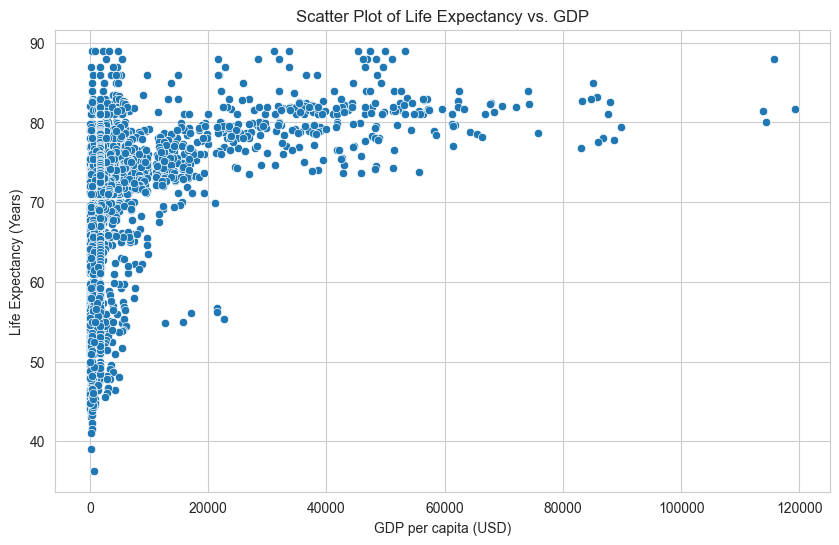

In [17]:
plt.figure(figsize=(10, 6)) # Set the figure size width, height

# Create the scatter plot using Seaborn's scatterplot function
sns.scatterplot(x=df['GDP'], y=df['Life expectancy'])

plt.title('Scatter Plot of Life Expectancy vs. GDP')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life Expectancy (Years)')
plt.show()

now writing the same code for scatterplot but this time with using plt.xscale('log')
Using a logarithmic scale ('log') on the x-axis can sometimes spread the points out better and reveal patterns more clearly.

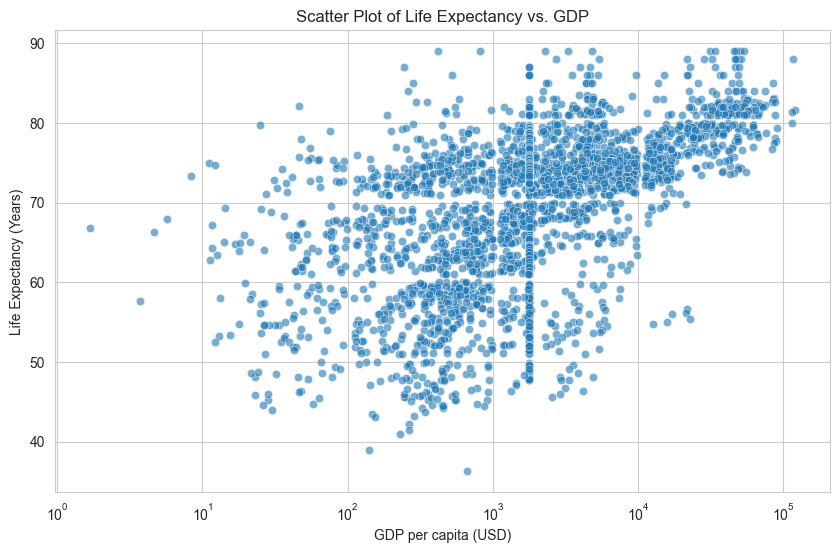

In [18]:
plt.figure(figsize=(10, 6)) # Set the figure size width, height

# Create the scatter plot using Seaborn's scatterplot function
sns.scatterplot(x=df['GDP'], y=df['Life expectancy'], alpha=0.6)

plt.title('Scatter Plot of Life Expectancy vs. GDP')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life Expectancy (Years)')
plt.xscale('log')
plt.show()

**Observation:**  
- Using raw GDP the plot is crowded and skewed by large GDP values. Using `xscale('log')` reveals an approximate diminishing-returns relationship: life expectancy rises quickly with GDP at low values and plateaus for high-GDP countries.  

## 7. Iterative Exploration: Multivariate Analysis (GDP, Life Exp, Pop, Status)

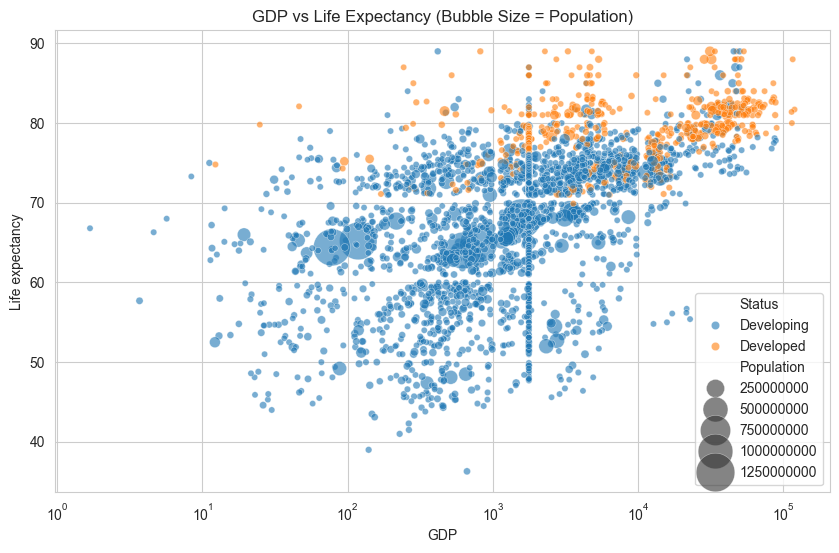

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(
data=df, x='GDP', y='Life expectancy',
size='Population', hue='Status', alpha=0.6, sizes=(20, 800)
)
plt.title("GDP vs Life Expectancy (Bubble Size = Population)")
plt.xscale('log')  # GDP is skewed
plt.show()

This is a more advanced iteration. I'm combining four variables into one chart to test multiple hypotheses:
1.  **X-Axis (log):** `GDP` (to confirm the non-linear trend)
2.  **Y-Axis:** `Life expectancy`
3.  **Size:** `Population` (to test the heatmap's `-0.0` correlation)
4.  **Color (Hue):** `Status` (to test the `Status` box plot findings)

**Insights from this single chart:**
* **GDP Trend:** The log-scale "diminishing returns" curve is clearly visible.
* **Status (Color):** The 'Developed' countries (orange) are clustered in the top-right (high GDP, high life). The 'Developing' countries (blue) are spread all across the plot, confirming the gap seen in the box plot.
* **Population (Size):** The bubbles are all different sizes at all different levels. There is no pattern. This visually confirms the `-0.0` correlation from the heatmap: a country's population size is not a strong predictor of its life expectancy.

## 8. Correlation matrix & heatmap

**Purpose:** compute Pearson correlations between numeric variables to identify strong linear relationships. We will visualize with a heatmap and highlight top correlations with life expectancy.

Task 1 also asks us to explore co-variance and correlation more broadly. A fantastic tool for this is a correlation matrix, which we can visualize as a heatmap.

This will create a grid showing all numerical variables, with a color indicating how strongly correlated any two variables are 
(e.g., from dark red for strong positive correlation to dark blue for strong negative correlation).

Understanding Correlation and Heatmaps

- **What is a Correlation Matrix?** 

A correlation matrix is a table that shows the correlation coefficient between all pairs of numerical variables in our dataset.

Correlation Coefficient: This is a number between -1 and +1.

+1: Perfect positive correlation (as one variable goes up, the other goes up perfectly).

-1: Perfect negative correlation (as one variable goes up, the other goes down perfectly).

0: No linear correlation (the variables don't show a straight-line relationship).

Values like +0.8 or -0.7 show strong relationships, while values like +0.1 or -0.2 show very weak relationships.

- **What is a Heatmap?**

A correlation matrix is just a big table of numbers. It's hard to read and spot patterns quickly. A heatmap is a visual representation of this table, where it uses colors to show the values.

For example, it might use a dark red for strong positive correlations (+1).

And a dark blue for strong negative correlations (-1).

And a light color for values near zero.

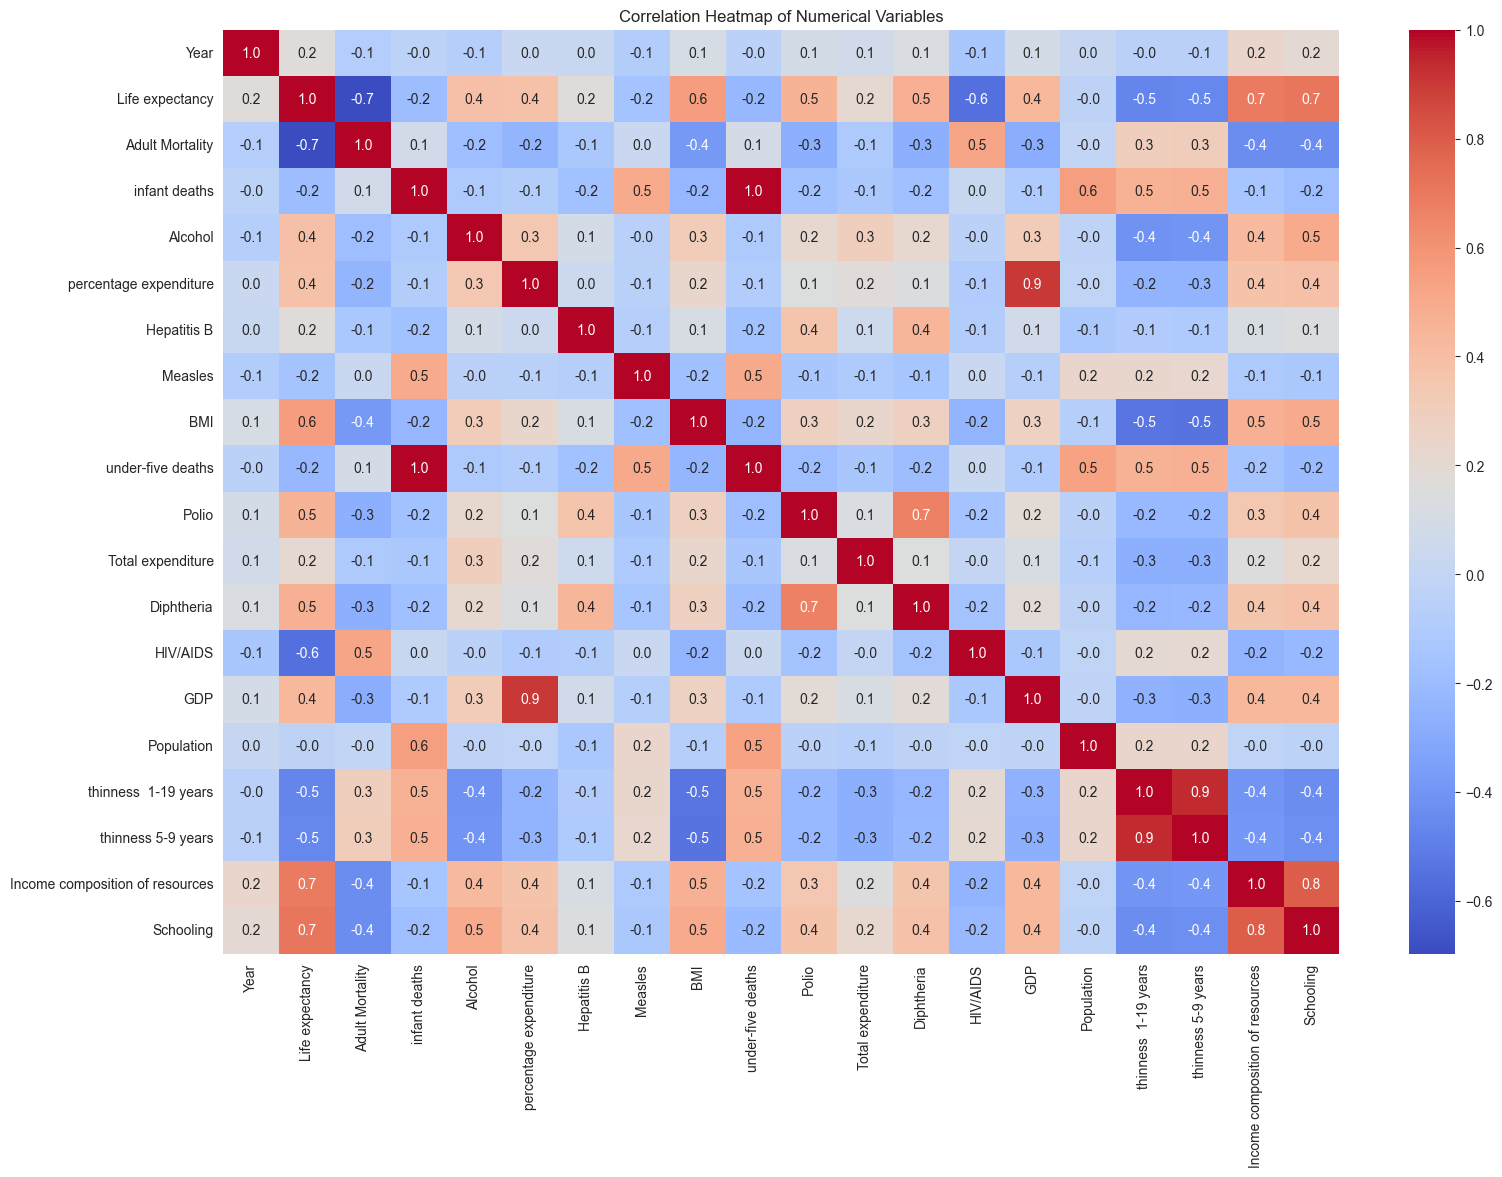

In [20]:
# we use .cor() on our data frame
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(18, 12)) # width, height in inches

sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm')
# annot=True:writes correlation no. on each square.
# fmt='.1f': formats the annotation (annot) to 1 decimal place (e.g., 0.8).
# cmap='coolwarm':'coolwarm' goes from blue (negative) to red (positive)

plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

**Key correlations with life expectancy (absolute strongest):**
- `schooling` — high positive correlation (suggests education strongly associated with life expectancy).
- `gdp` (log-transformed) — positive correlation but not as strong as schooling.
- `hiv_aids` — negative correlation (higher HIV prevalence → lower life expectancy).
- `adult_mortality` — strong negative correlation.

**Notes:** Pearson correlation measures linear association — non-linear relationships (e.g., plateauing GDP effect) will be understated. Also, correlation is not causation.

## 9. Iterative Exploration: Visually Confirming Strongest Correlates

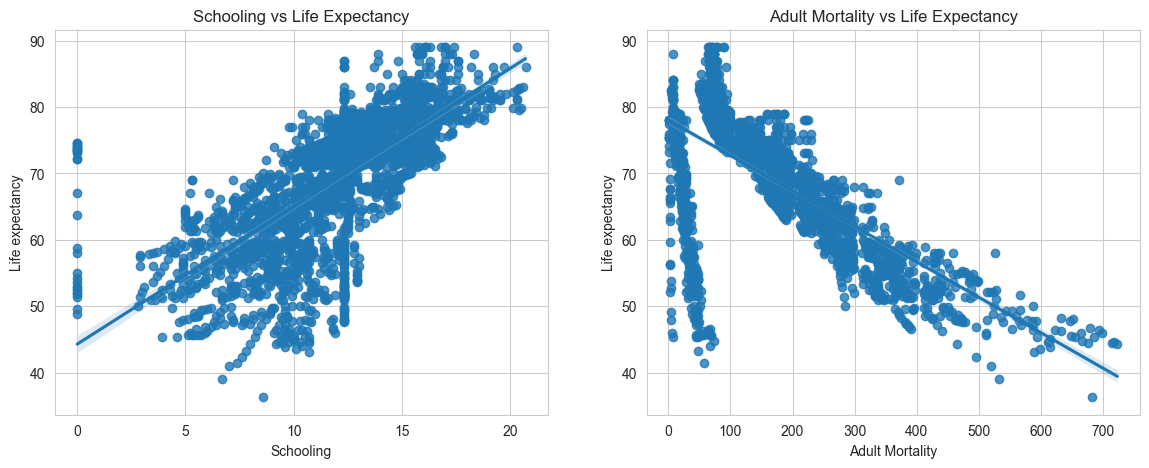

In [21]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.regplot(x='Schooling', y='Life expectancy', data=df, ax=ax[0])
ax[0].set_title("Schooling vs Life Expectancy")
sns.regplot(x='Adult Mortality', y='Life expectancy', data=df, ax=ax[1])
ax[1].set_title("Adult Mortality vs Life Expectancy")
plt.show()

After looking at the distribution of 'Life expectancy' by itself, the next logical step is to see how it relates to other key variables. Based on intuition, 'Schooling' (a social factor) and 'Adult Mortality' (a health factor) seem like crucial variables to check.

I'm using `sns.regplot` instead of a basic scatter plot because it adds a linear regression line. This is a great "creative choice" as it visually estimates the trend and helps confirm if the relationship is truly linear.

* **Life Expectancy vs. Schooling:** The scatter plot clearly shows a **strong, positive, and relatively linear relationship**. As the years of schooling increase, life expectancy consistently trends upward. This confirms that 'Schooling' is a key positive factor to keep an eye on.

* **Life Expectancy vs. Adult Mortality:** This plot shows an even stronger relationship, but in the opposite direction. It's a **powerful, negative, linear trend**. As adult mortality rates increase (moving right on the x-axis), life expectancy drops sharply (moving down on the y-axis). This is one of the tightest and most obvious relationships in the data.

These two plots confirm that my exploration is on the right track. The full correlation heatmap later will likely confirm these findings with strong correlation coefficients.

## 10. Categorical analysis — life expectancy by development status

**Purpose:** compare life expectancy distributions between 'developed' and 'developing' countries using boxplots and group statistics.

We've looked at numerical variables, and now our dataset has a very important categorical variable: Status (which has values like 'Developing' or 'Developed').

A great next step would be to compare the 'Life expectancy ' between these two groups.

We'll use a box plot again, but in a more powerful way. Instead of one box for all the data, we'll create two boxes side-by-side: one for all the 'Developed' country-years and one for all the 'Developing' country-years.

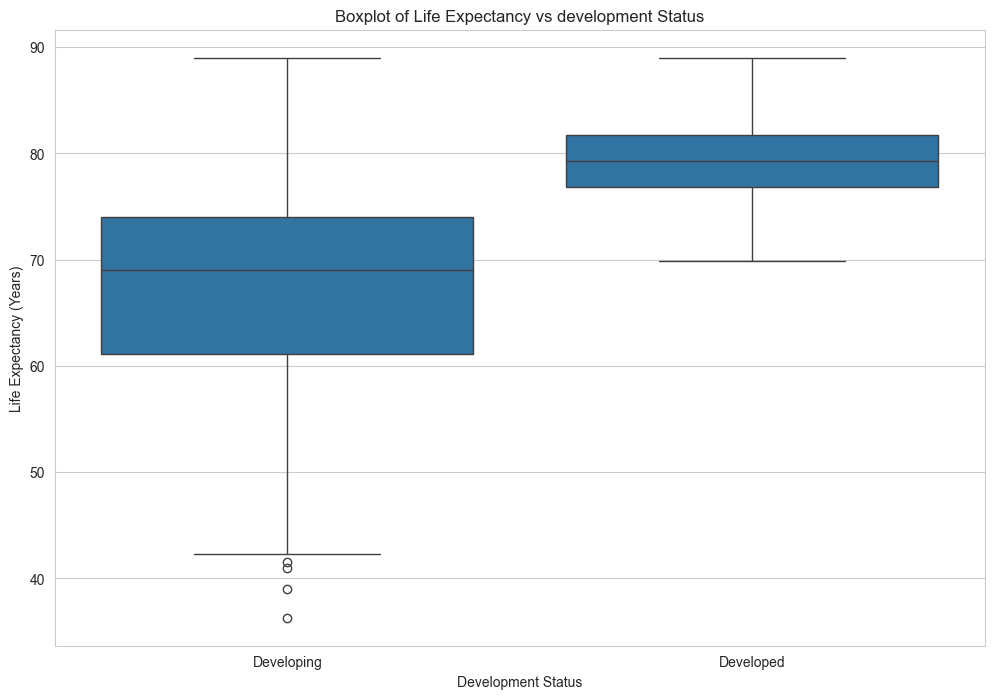

,count,mean,median,std
Status,,,,
Developed,512,79.197852,79.25,3.930942
Developing,2426,67.132028,69.05,8.993187


In [33]:
plt.figure(figsize=(12,8))  # Set the figure size (width, height in inches)

sns.boxplot(x=df['Status'], y=df['Life expectancy'])

plt.title('Boxplot of Life Expectancy vs development Status')
plt.xlabel('Development Status')
plt.ylabel('Life Expectancy (Years)')
plt.show()
df.groupby('Status')['Life expectancy'].agg(['count','mean','median','std'])

**Findings:**  
- There is a clear gap: developed countries have higher median life expectancy than developing ones (show numbers: medians and means).  
- Provide group-level statistics: mean and median life_expectancy per status and sample sizes.  
- Caution: status is a proxy and masks within-group variation — some developing countries have high life expectancy and vice versa.


## Conclusion

This exploratory analysis revealed critical insights linking socioeconomic and health conditions to life expectancy across the world. Visualizations consistently showed that higher schooling, better economic conditions, and lower adult mortality strongly align with longer lifespans. Developed countries show narrower variance and higher life expectancy, while developing regions display wide inequality — highlighting persistent public health challenges.

Design choices such as position-based comparisons (Cleveland and McGill), color-based grouping, and time-trend line plots ensured clarity and effective insight extraction. These visuals complement descriptive statistics by exposing meaningful structures that are less visible in numeric summaries alone.

These findings provide a strong foundation for future causal analysis or predictive modeling — now guided by data-driven visual understanding of the most influential health and socioeconomic variables.